In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
train_data = pd.read_csv(r"train.csv")
test_data = pd.read_csv(r"test.csv")

In [4]:
train_data.isnull().any()

id       False
label    False
tweet    False
dtype: bool

In [5]:
# checking for negative comments from the train dataset
train_data[train_data['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [6]:
# checking for positive comments from the test dataset
train_data[train_data['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


<Axes: >

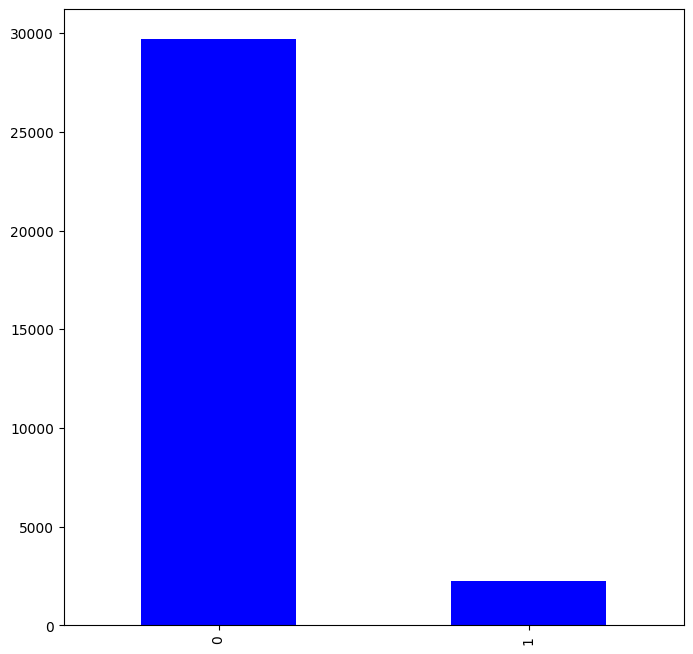

In [7]:
train_data['label'].value_counts().plot.bar(color = 'blue' , figsize=(8,8))

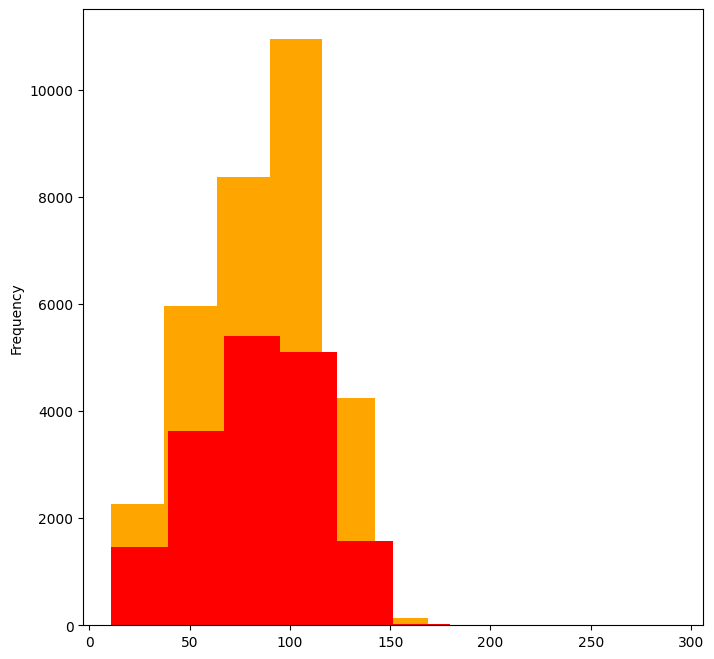

In [8]:
# checking the distribution of tweets in the data 

length_train = train_data['tweet'].str.len().plot.hist(color = 'orange' , figsize = (8,8))
length_test = test_data['tweet'].str.len().plot.hist(color = 'red' , figsize = (8,8))

In [9]:
# add column to represent the length of the tweets 
train_data['length'] = train_data['tweet'].str.len()
test_data['length']  = test_data['tweet'].str.len()
train_data.head()

,id,label,tweet,length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [10]:
train_data.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                 length                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

C:\Users\JAYDIP\AppData\Local\Temp\ipykernel_109540\1204377413.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_data.groupby('length').mean()['label'].plot.hist(color = 'green' , figsize = (5,5))


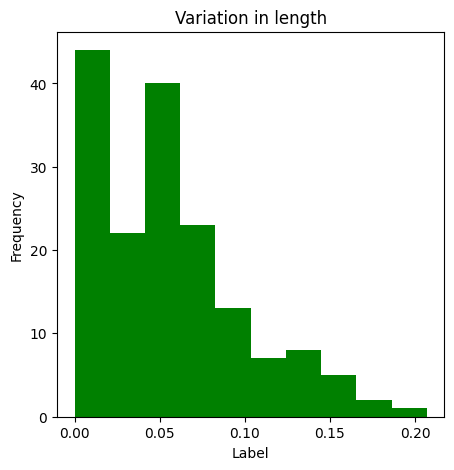

In [11]:
train_data.groupby('length').mean()['label'].plot.hist(color = 'green' , figsize = (5,5))
plt.title('Variation in length')
plt.xlabel('Label')
plt.show()

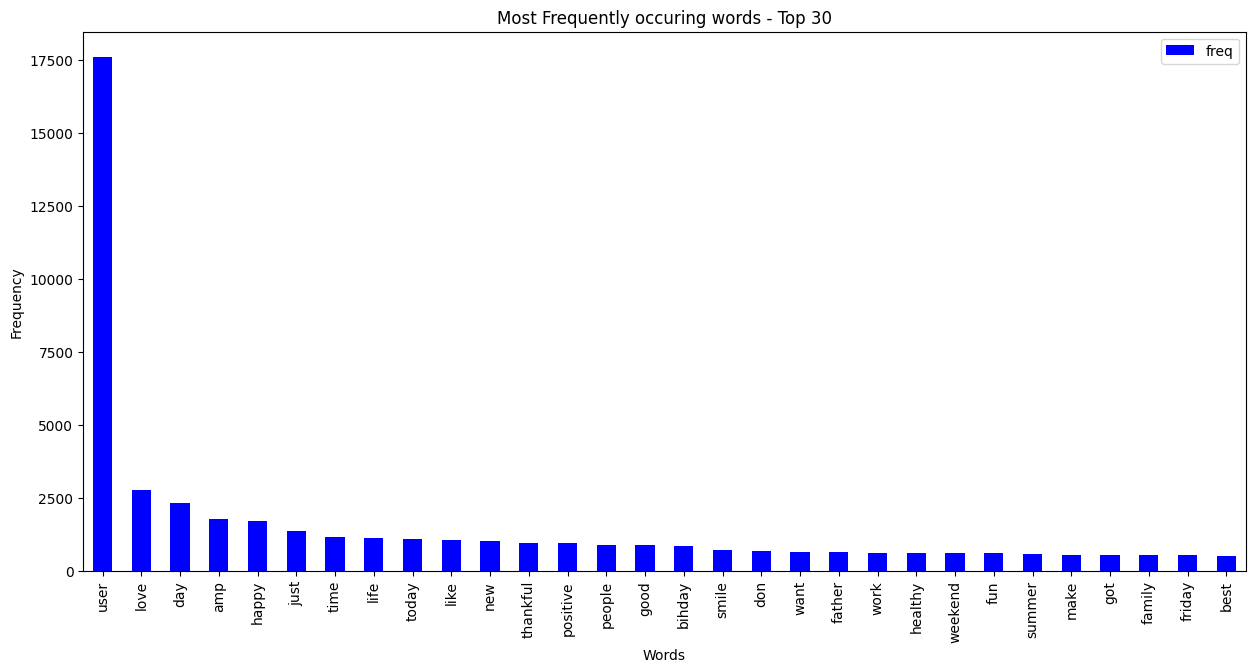

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_data.tweet)

sum_words = words.sum(axis = 0)

words_freq = [(word, sum_words[0,i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15,7), color= "blue")
plt.title("Most Frequently occuring words - Top 30")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [13]:
from wordcloud import WordCloud

WordCloud = WordCloud(background_color = 'black', width = 1000, height= 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(WordCloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize= 25)

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
from wordcloud import WordCloud
normal_words =' '.join([text for text in train_data['tweet'][train_data['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

In [ ]:
negative_words =' '.join([text for text in train_data['tweet'][train_data['label'] == 1]])

wordcloud = WordCloud(background_color = 'black', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [ ]:
# collecting the hashtags
import regex as re 

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train_data['tweet'][train_data['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train_data['tweet'][train_data['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [ ]:
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("TOP 20 POSITIVE WORDS")
plt.show()

In [ ]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("TOP 20 NEGATIVE WORDS")
plt.show()